### EDA on Air Quality Index

In [1]:
from readline import get_history_item

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils.db_engine import DBEngine

db = DBEngine()
engine = db.get_engine()

2025-04-14 06:45:33,014 - INFO - Database engine created successfully.


In [2]:
sql = """
SELECT lc.listing_db_id, lc.cluster_id, aq.aqi, aq.category
FROM rental_listings rl
JOIN listing_clusters lc on rl.listing_db_id = lc.listing_db_id
JOIN cluster_air_quality aq on lc.cluster_id = aq.cluster_id
ORDER BY lc.listing_db_id;
"""

aqi = pd.read_sql(sql, engine)

### Descriptive Statistics and Distribution Analysis

In [3]:
# Check for null values
aqi.isnull().sum()

listing_db_id    0
cluster_id       0
aqi              0
category         0
dtype: int64

In [4]:
# Get summary statistics
aqi[["aqi"]].describe()

,aqi
count,26014.000000
mean,45.102022
std,7.511672
min,10.000000
25%,45.000000
50%,46.000000
75%,47.000000
max,67.000000


In [5]:
aqi.head()

,listing_db_id,cluster_id,aqi,category
0,1,2586,45,Good
1,2,2684,45,Good
2,3,2607,45,Good
3,4,2530,45,Good
4,5,2586,45,Good


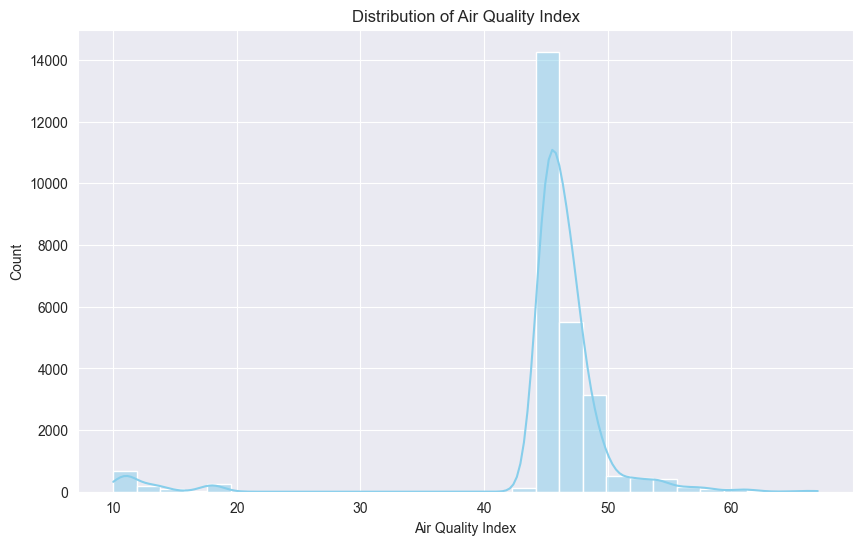

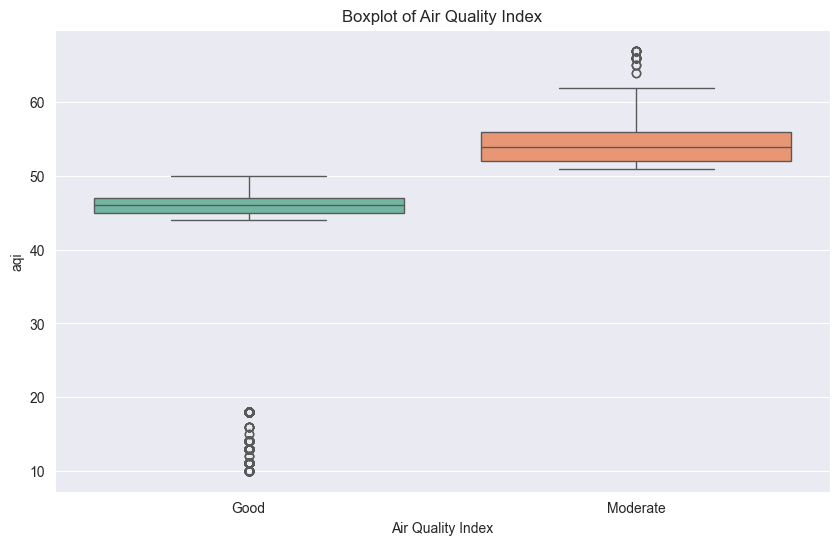

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(aqi["aqi"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Air Quality Index")
plt.xlabel("Air Quality Index")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x="category", y="aqi", data=aqi, palette="Set2", hue="category")
plt.title("Boxplot of Air Quality Index")
plt.xlabel("Air Quality Index")
plt.show()

Skewed, and outliers are present in the data. The boxplot shows that the AQI values are not evenly distributed across categories, with some categories having a wider range of values than others.

### Category Analysis

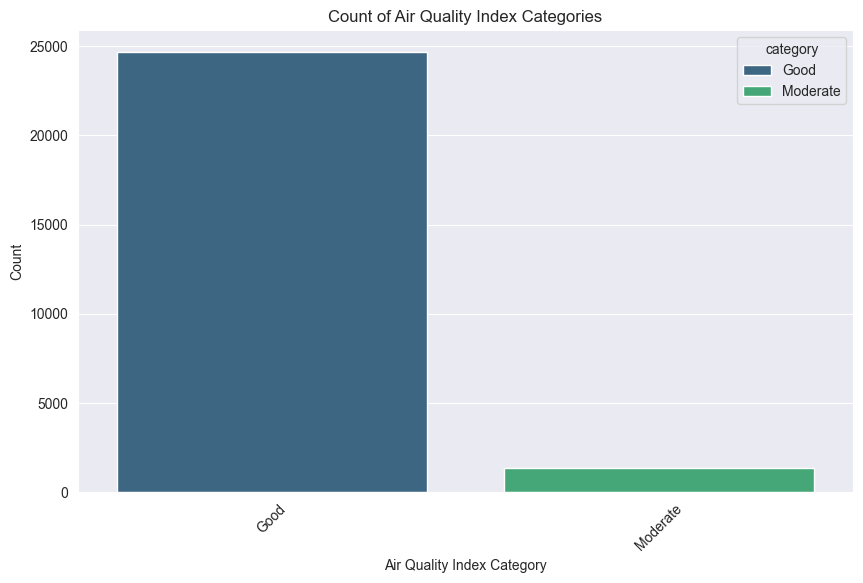

In [14]:
plt.figure(figsize=(10, 6))
order = aqi["category"].value_counts().index
sns.countplot(x="category", data=aqi, order=order, hue="category", palette="viridis", legend=True)
plt.title("Count of Air Quality Index Categories")
plt.xlabel("Air Quality Index Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### Analysis by Cluster

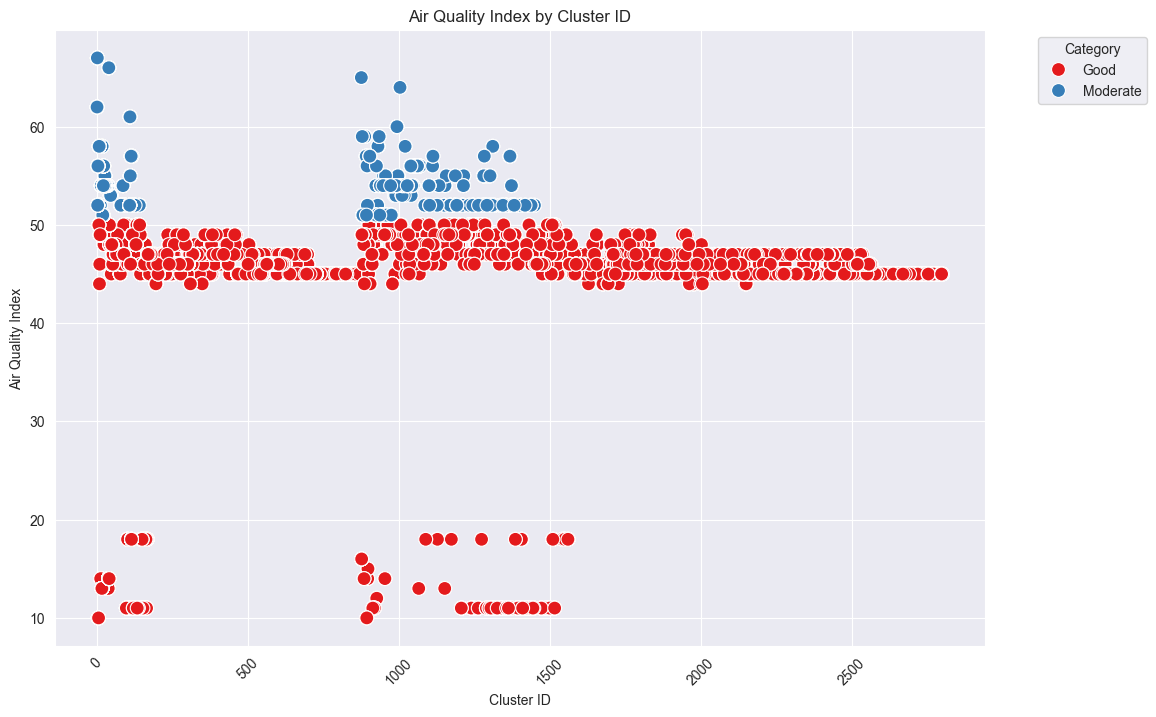

In [16]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="cluster_id", y="aqi", data=aqi, hue="category", palette="Set1", s=100)
plt.title("Air Quality Index by Cluster ID")
plt.xlabel("Cluster ID")
plt.ylabel("Air Quality Index")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc=2)
plt.xticks(rotation=45)
plt.show()

The cluster-level scatterplot shows good spatial diversity in AQI values

### Log Transformation

In [17]:
aqi["log_aqi"] = np.log(aqi["aqi"] + 1)

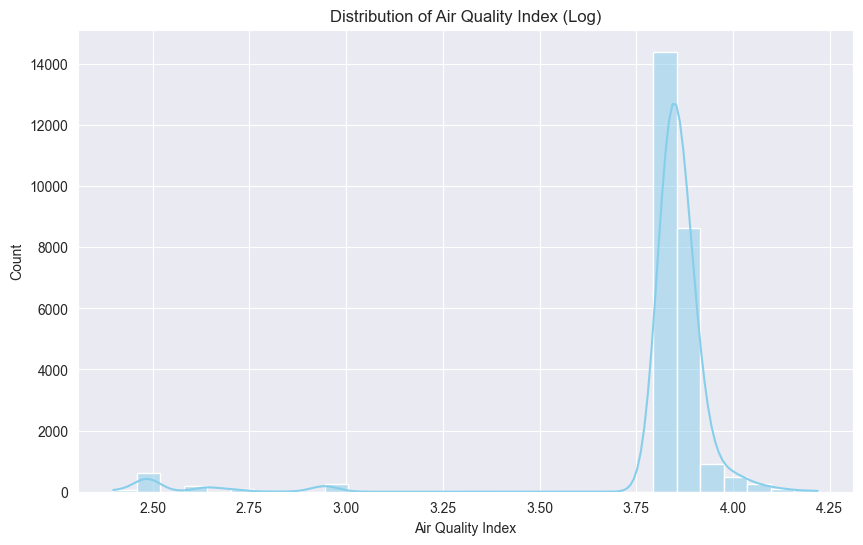

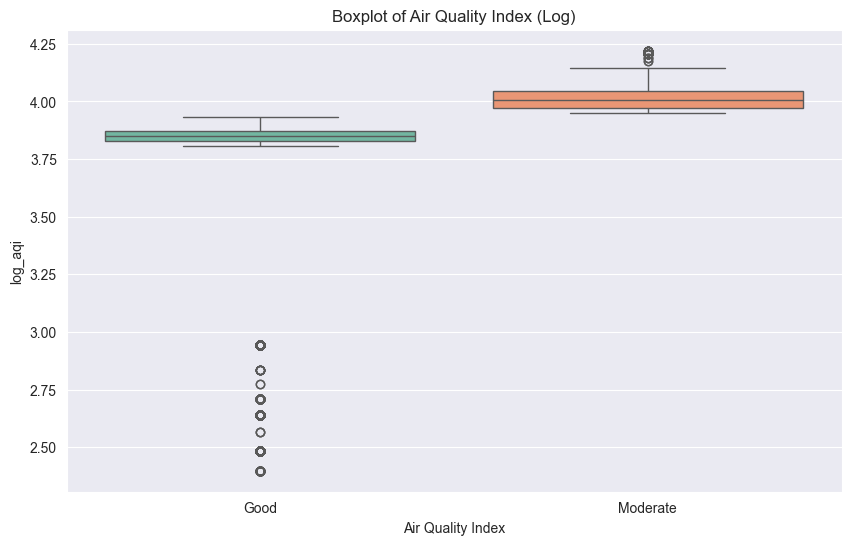

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(aqi["log_aqi"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Air Quality Index (Log)")
plt.xlabel("Air Quality Index")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x="category", y="log_aqi", data=aqi, palette="Set2", hue="category")
plt.title("Boxplot of Air Quality Index (Log)")
plt.xlabel("Air Quality Index")
plt.show()

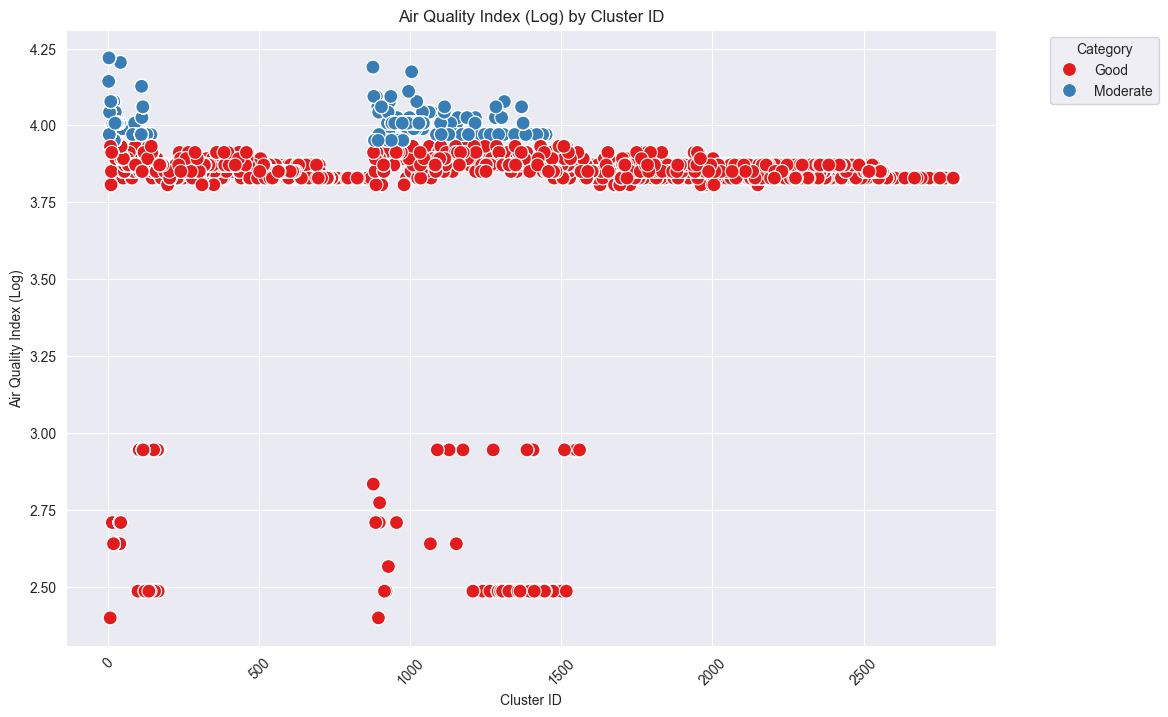

In [19]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="cluster_id", y="log_aqi", data=aqi, hue="category", palette="Set1", s=100)
plt.title("Air Quality Index (Log) by Cluster ID")
plt.xlabel("Cluster ID")
plt.ylabel("Air Quality Index (Log)")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc=2)
plt.xticks(rotation=45)
plt.show()

### Standardization

In [20]:
aqi_mean = aqi["log_aqi"].mean()
aqi_std = aqi["log_aqi"].std()

aqi["log_aqi_standardized"] = (aqi["log_aqi"] - aqi_mean) / aqi_std

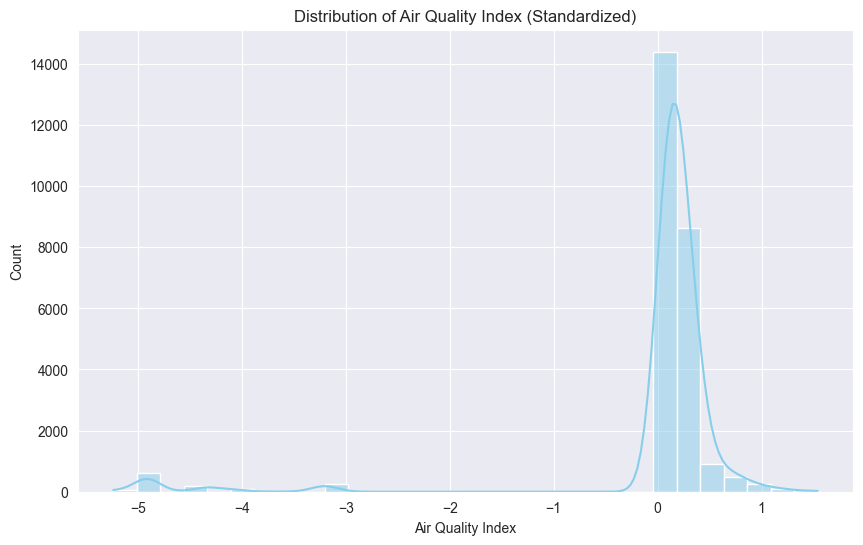

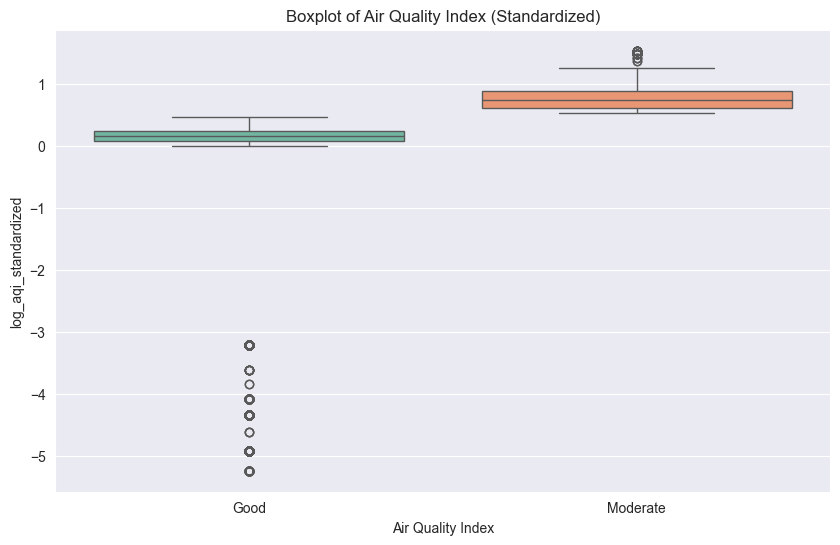

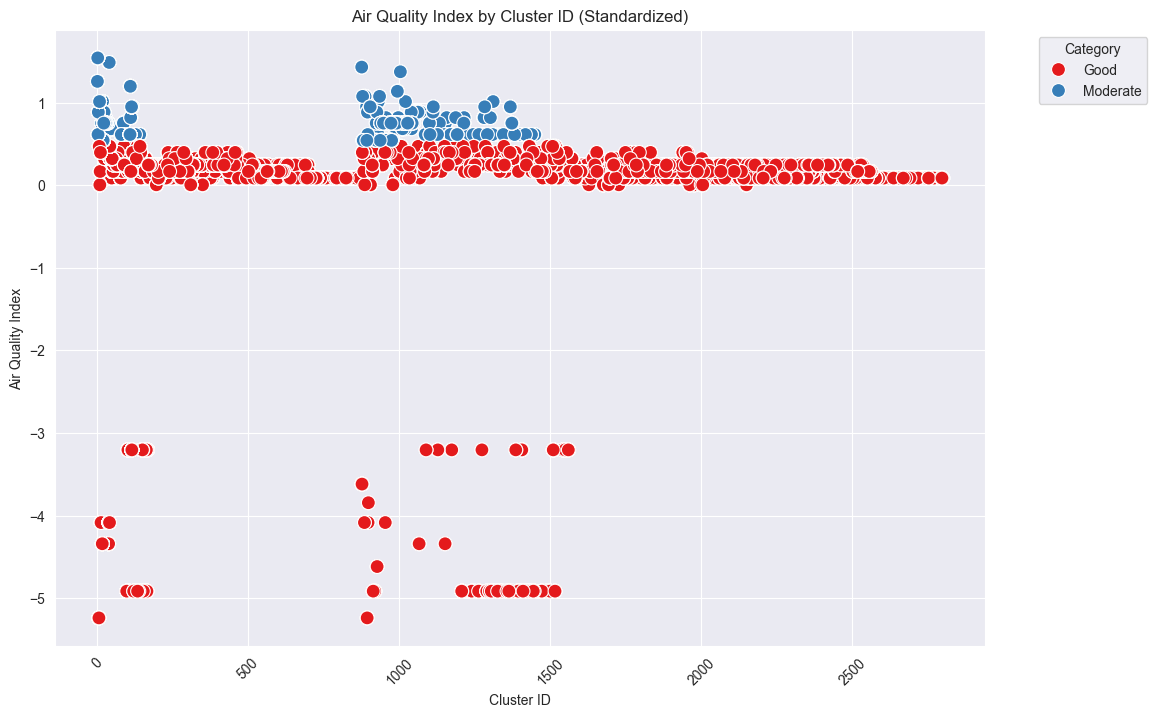

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(aqi["log_aqi_standardized"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Air Quality Index (Standardized)")
plt.xlabel("Air Quality Index")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x="category", y="log_aqi_standardized", data=aqi, palette="Set2", hue="category")
plt.title("Boxplot of Air Quality Index (Standardized)")
plt.xlabel("Air Quality Index")
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x="cluster_id", y="log_aqi_standardized", data=aqi, hue="category", palette="Set1", s=100)
plt.title("Air Quality Index by Cluster ID (Standardized)")
plt.xlabel("Cluster ID")
plt.ylabel("Air Quality Index")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc=2)
plt.xticks(rotation=45)
plt.show()

### Conclusion
1. Small samples of outliers, but not significant
2. Can do standardization for PCA (on AQI index): Should perform log transformation first, then standardization